<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Initialization-cell----run-this-first" data-toc-modified-id="Initialization-cell----run-this-first-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Initialization cell -- run this first</a></span></li><li><span><a href="#Procrustes-Analysis" data-toc-modified-id="Procrustes-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Procrustes Analysis</a></span><ul class="toc-item"><li><span><a href="#Application:-Aligining-2-D-data" data-toc-modified-id="Application:-Aligining-2-D-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Application: Aligining 2-D data</a></span></li><li><span><a href="#Application:-Aligning-3-D-molecular-data" data-toc-modified-id="Application:-Aligning-3-D-molecular-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Application: Aligning 3-D molecular data</a></span></li></ul></li><li><span><a href="#Learning-a-homographic-transformation" data-toc-modified-id="Learning-a-homographic-transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Learning a homographic transformation</a></span><ul class="toc-item"><li><span><a href="#Homography-estimation" data-toc-modified-id="Homography-estimation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Homography estimation</a></span></li><li><span><a href="#Application:-Photo-stitching-images-from-different-angles-into-a-panorama" data-toc-modified-id="Application:-Photo-stitching-images-from-different-angles-into-a-panorama-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Application: Photo-stitching images from different angles into a panorama</a></span></li><li><span><a href="#Application:-A-photo-stitch-of-your--images" data-toc-modified-id="Application:-A-photo-stitch-of-your--images-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Application: A photo-stitch of your  images</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Additional-Exercises" data-toc-modified-id="Additional-Exercises-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Additional Exercises</a></span></li><li><span><a href="#Two-sided-Procrustes-problems" data-toc-modified-id="Two-sided-Procrustes-problems-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Two-sided Procrustes problems</a></span><ul class="toc-item"><li><span><a href="#Automatically-determining-landmarks-in-images-for-homography-estimation" data-toc-modified-id="Automatically-determining-landmarks-in-images-for-homography-estimation-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Automatically determining landmarks in images for homography estimation</a></span></li><li><span><a href="#Automatic-photo-mosaicking-that-works-well-with--images--of-your-choosing" data-toc-modified-id="Automatic-photo-mosaicking-that-works-well-with--images--of-your-choosing-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Automatic photo-mosaicking that works well with  images  of your choosing</a></span></li><li><span><a href="#Automatic-photo-mosaicking-that-does-not-work-well" data-toc-modified-id="Automatic-photo-mosaicking-that-does-not-work-well-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Automatic photo-mosaicking that does <strong>not</strong> work well</a></span></li><li><span><a href="#(optional)-Symmetric-Procrustes--and-the-Travelling-Salesman-connection" data-toc-modified-id="(optional)-Symmetric-Procrustes--and-the-Travelling-Salesman-connection-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>(optional) Symmetric Procrustes  and the Travelling Salesman connection</a></span></li><li><span><a href="#Open-Problems:-Solving-these-will-make-you-famous" data-toc-modified-id="Open-Problems:-Solving-these-will-make-you-famous-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Open Problems: Solving these will make you famous</a></span></li><li><span><a href="#Application:-The-symmetric-travelling-salesman-problem" data-toc-modified-id="Application:-The-symmetric-travelling-salesman-problem-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>Application: The symmetric travelling salesman problem</a></span></li></ul></li></ul></div>

# Initialization cell -- run this first

In [1]:
using Plots, Interact, JLD, Images
using LinearAlgebra
using Statistics: mean
using Random: randperm
gr(
    label="",
#     markersize=5,
    markerstrokewidth=0.3,
    markerstrokecolor="white"
)

function plot2d(
        X::Matrix;
        labels=collect('a':('a' + size(X, 1) - 1)), 
        offsetx=0, 
        offsety=0,
        kwargs...
    )
    plot(
        X[:, 1], X[:, 2];
        aspect_ratio=:equal, markershape=:circle, 
        markersize=12, markeralpha=0.2,
        kwargs...
    )
    annotate!(X[:, 1] .+ offsetx, X[:, 2] .+ offsety, labels; fontsize=7)
end

function plot2d!(
        X::Matrix;
        labels=collect('a':('a' + size(X, 1) - 1)), 
        offsetx=0, 
        offsety=0,
        kwargs...
    )
    plot!(
        X[:, 1], X[:, 2];
        aspect_ratio=:equal, markersize=12, 
        markershape=:circle, markeralpha=0.2, 
        kwargs...
    )
    annotate!(X[:, 1] .+ offsetx, X[:, 2] .+ offsety, labels)
end

function imshow(X; kw_args...)
    return heatmap(X;
        yflip=true,
        color=:grays,
        aspect_ratio=:equal,
        axis=false,
        ticks=false,
        colorbar=false,
        kw_args...,
    )
end

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-1158563931625890323\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-261901588930168628\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-1158563931625890323\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

imshow (generic function with 1 method)

# Procrustes Analysis

Consider a set of points encoded by the rows of a $m \times 2$ matrix $Y$. 

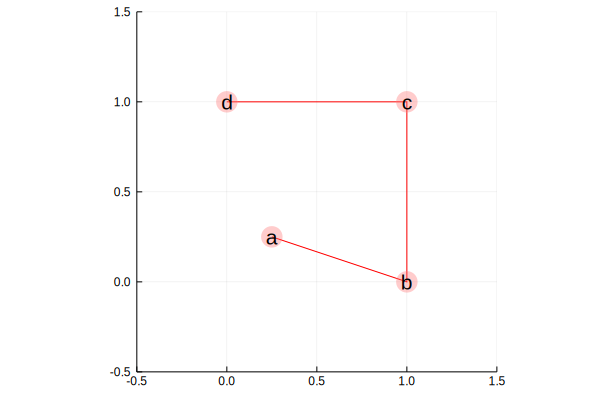

In [2]:
l = ["a", "b", "c", "d"]
Y = [0.25 0.25; 1 0; 1 1; 0  1]
plot2d(Y; labels=l, xlim=(-0.5, 1.5), ylim=(-0.5, 1.5), color="red")

We generate a $2 \times 2$ orthogonal matrix $Q$ and the matrix $X$ as in the code cell below. 

In [3]:
θ = π / 4
@show Q = [cos(θ) -sin(θ); sin(θ) cos(θ)]
X = Y * Q

Q = [cos(θ) -(sin(θ)); sin(θ) cos(θ)] = [0.707107 -0.707107; 0.707107 0.707107]


4×2 Array{Float64,2}:
 0.353553   2.77556e-17
 0.707107  -0.707107   
 1.41421    1.11022e-16
 0.707107   0.707107   

Physically, if the *rows* of $Y$ represent the coordinates associatd with the $n$ points, then $Y[i,:] Q$ corresponds to a **pure rotation** or **rigid body rotation** of these coordinates, as depicted graphically in the following cell.  

In [ ]:
plot2d(Y; color=:red, label="Y", legend=:bottomleft)
plot2d!(X; color=:blue, label="X", xlim=(-0.5, 1.5), ylim=(-1.5, 1.5))

Indeed! The **Orthogonal Procrustes** problem assumes that we are given two $m \times n$ matrices $X$ and $Y$, whose $m$ *rows* contain $n$-dimensional vectors that correspond to each other. We wish to align these points. 

To that end we hypothesize that

$$ X[i,:] \approx Y[i,:] Q,$$

where $Q$ is an orthogonal matrix. In other words, the rows of $X$ and $Y$ are related by an orthogonal transformation, or equivalently by a change of coordinates. 

Our goal is to **align the points** -- we can do so by determining the orthogonal matrix relating the set of points by  solving the optimization problem

$$ Q_{\sf opt} = \arg \min_{Q} \lVert X - Y\,Q\rVert^2_F \\\textrm{ subject to } Q^T Q = I_n.$$

Let $U \Sigma V^T $ be the singular value decomposition of $X^T Y$. Then 

$$\textrm{Tr} (X^T Y Q)  =  \textrm{Tr} (U \Sigma V^T Q) = \textrm{Tr} \left[ \Sigma V^T Q U \right].$$

Thus, we can recover $Q_{\sf opt}$ from the solution $W_{\sf opt}$ to the optimization problem 

\begin{equation}
W_{\sf opt} = \arg \max_{W} \textrm{Tr} \left[ \Sigma W\right] \\ \textrm{ subject to } W^T W = I_n.
\end{equation}

In practice, two sets of corresponding points might be related via a scaling and translation so that 

$$X[i,:] \approx \alpha Y[i,:] Q + \mu^T,$$

where $\mu$ is a translation vector and $\alpha$ is a scaling factor. We can visualize this graphically as in the next cell. 

In [ ]:
α = 0.5
μ = [1; 1] 
X = α * Y * Q .+ μ'

plot2d(Y; color=:red, markershape=:square, label="Y", legend=:bottomleft)
plot2d!(X; color=:blue, label="X", xlim=(-0.5, 2.5), ylim=(-1.5, 2.5))

 We can formulate the general rotate-scale-shift Procrustes alignment problem as the optimization problem:

\begin{equation} 
Q_{\sf opt}, \alpha_{\sf opt}, \mu_{\sf opt} = \arg \min_{Q, \alpha, \mu} \lVert X - \alpha Y\,Q - 1_m \mu^T \rVert_F^2 \\ \textrm{ subject to } Q^T Q = I_n,
\end{equation}

where $1_m$ denotes the $m$-dimensional all ones vector. We have to solve for the three unknown parameters $\alpha$, $\mu$ and $Q$. This optimization problem has a special form -- if two of the three parameters are fixed (or assumed known), then we can analytically solve for the third parameter. We employ this to find the solution as described next.

The latter fact implies that the objective function can be rewritten  as 

$$\lVert X - \alpha Y\,Q - 1_m \mu_x^T - \alpha 1 \mu_Y^T Q \rVert_F^2 = \lVert X - 1 \mu_X^T -\alpha(Y-1 \mu_Y^T)Q\rVert_F^2 ,$$

where we have dropped the suffix $m$ in $1_m$ for brevity. Thus the optimization problem can be reduced  to 

\begin{equation}
\alpha_{\sf opt}, Q_{\sf opt} = \arg \min_{Q,\alpha} \lVert X_0 - \alpha Y_0\,Q \rVert_F^2 \\ \textrm{ subject to } Q^TQ = I,
\end{equation}

where

\begin{equation}
X_0 = X - 1 \mu_X^T,
\end{equation}

and

\begin{equation}
Y_0 = X - 1 \mu_Y^T.
\end{equation}

In other words, the points represented by the rows of $X_0$ and $Y_0$ have a centroid of zero. 

We now have an optimization problem involving just two unknowns $\alpha$ and $Q$ instead of three unknowns. We formulate its solution next. 

Write a function called `procrustes`  which takes as inputs the matrices `X` and `Y` and returns as its output the matrix 

$$Y_a = \alpha_{\sf opt} Y_0 Q_{\sf opt} + 1 \mu_X^T,$$

and the matrix $Q_{\sf opt}$. The rows of $Y_a$ are the linearly transformed points of $Y$ that are closest to the corresponding points of $X$.


In [ ]:
using LinearAlgebra: svd, tr
using Statistics: mean


"""
    Ya = procrustes(X, Y)

Returns Ya = alpha * (Y - muY) * Q + muX, where muX and muY are the m x n
matrices whose rows contain copies of the centroids of X and Y, and alpha
(scalar) and Q (m x m orthogonal matrix) are the solutions to the Procrustes
+ scaling problem

Inputs: `X` and `Y` are m x n matrices

Output: `Ya` is an m x n matrix containing the Procrustes-aligned version
of Y aligned to X and Q the optimal orthogonal matrix

min_{alpha, Q: Q^T Q = I} |(X - muX) - alpha * (Y - muY) Q|_F
"""
function procrustes(X::Matrix, Y::Matrix)
   
    muX = mean(X; dims=1)
    muY = mean(Y; dims=1)
    
    X0 = X .- muX 
    Y0 = Y .- muY 

    # Procrustes rotation
    U, _, V = svd(X0' * Y0; full=false) ## TODO: Fill in ?? Hint: Use answer from quiz above. 
    Q = V * U' ## TODO: Fill in ?? Use answer from quiz above.

    # Optimal scaling
    alpha = tr(X0' * Y0 * Q) / tr(Y0' * Y0)  ## TODO: Fill in ?? Use answer from quiz above.

    # Align data
    Ya = alpha * (Y0 * Q) .+ muX
   
    return Ya, Q
end

It is important to consider the data and determine whether the rows or the columns represent the points that correspond. The answer can be different as illustrated next. 

## Application: Aligining 2-D data

We now use the Procrustes algorithm to align shapes in 2-D. We first load the data set in the next cell.

In [ ]:
using JLD
d = JLD.load("misaligned_digit1.jld")
X, Y = d["X"], d["Y"]
@show size(X)
@show size(Y);

We display the data next.

In [ ]:
plot2d(X)

In [ ]:
plot2d(X; color=:red, label="target", legend=:bottomleft)
plot2d!(Y; color=:blue, markershape=:circle, label="misaligned")

In [ ]:
Ya = procrustes(X, Y)[1] ## TODO: Fill in ?? X or X', Y or Y' ?
plot2d(X; color=:red, label="target", legend=:bottomleft)
plot2d!(Y; labels="", color=:blue, label="misaligned", markersize=5, markeralpha=1)
plot2d!(Ya; labels="", color=:cyan, label="aligned", markersize=5, markeralpha=1)

We now illustrate the algorithm on another example.

In [ ]:
d = JLD.load("misaligned_digits2.jld")

X, Y = d["X"], d["Y"]

In [ ]:
plot2d(X; color=:red, label="target", legend=:bottomright)
plot2d!(Y; color=:blue, label="misaligned", markersize=5, labels="", markeralpha=1)

In [ ]:
Ya = procrustes(X, Y)[1] ## TODO: Fill in ??
plot2d(X; color=:red, label="target", legend=:bottomleft)
plot2d!(Y; labels="", color=:blue, label="misaligned", markersize=5, markeralpha=1)
plot2d!(Ya; labels="", color=:cyan, label="aligned", markersize=5, markeralpha=1, xlim=(-40, 40))

## Application: Aligning 3-D molecular data  

We now illustrate the use of the Procrustes algorithm to align 3-D molecular data. We first load the dataset in the next cell.

In [ ]:
moleculeData = JLD.load("moleculeData.jld")["moleculeData"]
@show size(moleculeData);

 The variable `moleculeData` which contains a  3-by-22-by-250 matrix that contains 250 molecule shapes, each defined by 22 $(x,~y,~z)$ coordinates. We now display these molecules in 3-D using the commands in the next code cell. 

In [ ]:
function plot_molecule(moleculeData; kwargs...)
    return plot(
        moleculeData[1, :, 1], 
        moleculeData[2, :, 1],
        moleculeData[3, :, 1];
        markershape=:circle,
        alpha=0.5,
        kwargs...
    )
end

function plot_molecule!(moleculeData; kwargs...)
    return plot!(
        moleculeData[1, :, 1], 
        moleculeData[2, :, 1],
        moleculeData[3, :, 1];
        markershape=:circle,
        alpha=0.5,
        kwargs...
    )
end

In [ ]:
@manipulate throttle = 0.2 for moleculeNum in 1:size(moleculeData, 3)
    plot_molecule(
        moleculeData[:, :, 1];
        color=:red,
        label="reference",
        aspect_ratio=:equal,
        xlim=(-30, 30),
        ylim=(-30, 30),
        zlim=(-30, 40)
    )
    plot_molecule!(moleculeData[:, :, moleculeNum]; color=:blue, label="misaligned")
end    

The shapes of the two molecules are similar, but they are oriented and centered differently. Plotting all the molecules together using reveals a big mess!


In [ ]:
plot_molecule(moleculeData[:, :, 1]; color=:red)
for moleculeNum in 2:size(moleculeData, 3) 
    plot_molecule!(moleculeData[:, :, moleculeNum]; color=:blue, alpha=0.1)
end
plot!()

One way to define a "mean molecule" is the arithmetic mean of the Procrustes-aligned molecules. A subtlety is that Procrustes analysis was derived for aligning *two* shapes. Here, you will extend this to more than two shapes by doing the following:

+ Align Molecule 2 to Molecule 1 using the `procrustes` function.
+ Compute the coordinate-wise mean of Molecule 1 and (aligned) Molecule 2
+ Align Molecule 3 to the mean molecule from (ii), then update the mean molecule by averaging all three (aligned) molecules

Hint: Remember that `procrustes` expects $n \times d$ inputs; in this case, $d = 3$.

In [ ]:
meanMolecule = moleculeData[:, :, 1]
for j in 2:size(moleculeData, 3)
    nextMoleculeAligned = procrustes(Array(meanMolecule'), Array(moleculeData[:,:,j]'))[1]' ## TODO: Fill in ?? See hint above
    meanMolecule = 0.5 * meanMolecule + 0.5 * nextMoleculeAligned
end
plot_molecule(moleculeData[:, :, 1]; color=:red, label="molecule 1")
plot_molecule!(meanMolecule; color=:blue, label="meanMolecule")

This example illustrates how Procrustes analysis brings into sharper focus patterns that were invisble due misalignment of data. 

# Learning a homographic transformation

Homography refers to the transformation of points induced by a change in camera viewing angle. We illustrate this using an  example below. To that end, we first load two images of the University of Michigan's law library.

In [ ]:
using JLD
d = load("law.jld")
im1, im2 = d["law1"], d["law2"]
XY1, XY2 = d["XY1"], d["XY2"];

We first display Image 1 which corresponds to a view of the library from a particular camera angle.



In [ ]:
imshow(im1)

We now display Image 2 which shows the law library from a different angle. 

In [ ]:
imshow(im2)

The following cell shows a set of points numbered from $1$ to $8$ -- these are points in one image that correspond to the points in the other image.

In [ ]:
function imshow_shared_points(im1, im2, XY1, XY2; numbering::Bool=true)
    p1 = imshow(im1)
    scatter!(XY1[:, 1], XY1[:, 2]; markersize=10)
    numbering && annotate!(XY1[:, 1], XY1[:, 2], 1:size(XY1, 1))
    p2 = imshow(im2)
    scatter!(XY2[:, 1], XY2[:, 2]; markersize=10)
    numbering && annotate!(XY2[:, 1], XY2[:, 2], 1:size(XY2, 1))
    plot(p1, p2, layout = (1, 2), size=(950, 300))
end
imshow_shared_points(im1, im2, XY1, XY2)

Finally, here is a "straight up" view of the law library

![Law library](lawlibrary_inside.png)

This is a homographic transformation!

You will notice that each picture was taken from the **same position** but with the camera facing a different direction. To be able to compute the perpsective transformation, we need to identify a common set of points in each image. 

**Different types of transformations** are represented in the diagram below.

![Different types of transformations](types_transforms.png)

Homography is a **2-d projective transformation**. It captures the class of transformations when a camera changes its viewing angle. In that sense it goes beyond the rotation, scaling and transation that Procrustes analysis captures. We will now describe how to learn such projective transforamtions in 2-d -- this corresponds to learning to align points that have been captured by a camera(s) from two different viewing angles.   

For some
$H \in \mathbb{R}^{3 \times 3}$,
and $i  = 1, \ldots, n$  we have 

\begin{equation}
\label{eq:projective1}
\beta_i^T  = \begin{bmatrix} k_i \widetilde{x}_i \\
                              k_i \widetilde{y}_i \\
                              k _i  
\end{bmatrix}^T = 
 \underbrace{\begin{bmatrix} 
 {x}_i \\
{y}_i \\
1 \end{bmatrix}^T}_{=: \alpha_i} \! \! \! \! \! H         
%\underbrace{\begin{bmatrix} h_{1}^{T} \\ h_{2}^{T} \\ h_{3}^{T} \end{bmatrix}}_{=:H} 
= \alpha_i ^T\, H,
\end{equation}

where $k_i$, the third component of the vector $\beta_i$ is non-zero.   (Now $\beta_i$ is a vector.)

Our goal is to re-arrange this relationship to get an equation of the form

\begin{equation*}
A_i h = 0.
\end{equation*}

where the matrix $A_i$ will depend on $\widetilde{x}_i$,  $\widetilde{y}_i$, $x_i$ and $y_i$ but **not** on $k_i$ -- which in  projective geometry is the arbitary scale factor. 

Define the $9 \times 1$ vector 
 
$$h = \begin{bmatrix} H[:,1] \\ H[:,2] \\ H[:,3] \end{bmatrix}.$$
 

This is the relationship satisfied by the points $(x_i,y_i)$ and $(\widetilde{x}_i,\widetilde{y}_i)$ that are related by a **projective transformation**.

If we are given $n$ sets of such points related by the same transformation, then for each of the $n$ points we have $A_i h = 0$ for $i = 1, \ldots, n$. This yields the simultaneous system of equations: 
\begin{equation*}
\underbrace{\begin{bmatrix} A_1 \\ A_2 \\ \vdots \\ A_n \end{bmatrix}}_{:= A} h = 0,
\end{equation*}
 
 where $A$ is a $2n \times 9$ matrix.

By convention we set $H[3,3]=1$, so there are $8$ unknown parameters in the homography matrix that must be estimated.  

## Homography estimation

If given $n$ such points, we can **find the homography matrix via the least-squares problem**:

\begin{equation}
\tilde{h}_{\sf opt} = \arg \min \left\lVert A \begin{bmatrix} \tilde{h} \\ 1 \end{bmatrix} \right\rVert_2^2
\end{equation}

**Exercise**: Rewite this as a standard ordinary least squares problem of the form

$$\tilde{h}_{\sf opt} = \arg \min \left\lVert \tilde{A} \tilde{h} - \tilde{b}\right\rVert_{2}^2,$$

and write the minimum-norm solution in closed form.

Hint: Rearrange the terms by using the fact that  $A = \begin{bmatrix} A[:,1:8] & A[:,9] \end{bmatrix}$.

In [ ]:
using LinearAlgebra: pinv
"""
    H = projective_transform(XY, XYtil)

Inputs:
* `XY`, `XYtil`: n x 2 matrix containing (x, y) coordinates for n corresponding points in two coordinate systems
         
Outputs: `H` is the unique 3 x 3 projective transformation matrix that maps XY to `XYtil` with H[3, 3] = 1. That is, in the ideal case, the following relationship should hold:

    tmp = [XY ones(n)] * H
    XYtil = tmp[:, 1:2] ./ tmp[:, 3]
"""
function projective_transform(XY::Matrix, XYtil::Matrix)
   # Construct A
    n = size(XY, 1)
    A = zeros(2n, 9)
     for i in 1:n
        alphai = [XY[i, :]; 1]
        A[2i - 1, :] = [alphai; zeros(3); -XYtil[i, 1] * alphai] 
        A[2i, :] = [zeros(3); alphai; -XYtil[i, 2] * alphai]
    end

    Atil = A[:, 1:8]
    btil  = - A[:, 9] 
    htil  = pinv(Atil) * btil
    
    h = vcat(htil, 1) ## This sets H[3, 3] = 1 according to convention
    H = reshape(h, 3, 3)

    return H
end

We now estimate the homography matrix for the points in the law library. The code in the next cell computes the homography corresponding to the transformation from the view in image 2 to the view in image 1.   

In [ ]:
H21 = projective_transform(XY2, XY1) # 2 --> 1

We now estimate the homography matrix corresponding to the transformation from the view in image 1 to the view in image 2. 

In [ ]:
H12 = projective_transform(XY1, XY2) # 1 --> 2

Note that $H[3,3] = 1$ in both cases, as desired.

## Application: Photo-stitching images from different angles into a panorama

The homography matrix allows us to transform *all* points in image 1 into points corresponding to the view in image 2, and vice versa. We can use this to create a panoramic view, as we illustrate next. 

In [ ]:
include("imagestitcher.jl")
using Main.WebStitcher

In [ ]:
]build ImageMagick

In [ ]:
using Images, LinearAlgebra
im1, im2 = load("law1.jpg"), load("law2.jpg");

We now stitch the  images from the perspective of image 1. 


In [ ]:
I1 = [
    ImageStitcher(im1, Matrix(1.0I, 3, 3)),
    ImageStitcher(im2, H21)
]
imS1 = WebStitcher.stitchImages(I1)
imshow(imS1)

We now stitch the images from the perspective of image 2. 

In [ ]:
# Stitch images from perspective 2
I2 = [
    ImageStitcher(im2, Matrix(1.0I, 3, 3)),
    ImageStitcher(im1, H12)
]

# order="natural": closet (to chosen persepctive) displayed on top
# order="reverse": farthest displayed on top
imS2 = stitchImages(I2)
imshow(imS2)

## Application: A photo-stitch of your  images

We are now ready to do it for your picture. First upload two sets of images that you will like to photostitch like above.

In [ ]:
im_name = "living_room" ## your image -- save it as im_name1.jpg and im_name2.jpg
inpath1 = "$(im_name)1.jpg" # change file extension accordingly
inpath2 = "$(im_name)2.jpg"

## Load images and convert to an Array
im1 = load(inpath1)
im2 = load(inpath2);

**Instructions**

First pick a feature (say, a window or a logo or symbol) that also appears in the first image by moving the crosshairs of the pointer to the point and clicking. You will then be prompted to identify the corresponding point in the second image. This process is then repeated `n` times.

Some tips:

1) It is **important that the points match** --

2) If you select the corner of a door in one image that does not appear in the second image, the result will not look good. 

2) Picking corresponding points on the same plane works best!

With these tips, we now select the correspondences by manually picking the points.

In [ ]:
 n = 8 # correspondences (>= 4)
(XY1_ref, XY2_ref), widg = WebStitcher.getcorrespondences(im1, im2, n)
widg

Execute the next cell after point picking is done so the variables `XY1` and `XY2` are populated.

In [ ]:
if XY1_ref != nothing 
    XY1, XY2 = XY1_ref[], XY2_ref[]
end

We now compute the perspective transformations and stitch the images from the perspective of Image 1.



In [ ]:
H21 = projective_transform(XY2, XY1) # 2 --> 1
I1 = [
    ImageStitcher(im1, Matrix(1.0I, 3, 3)),
    ImageStitcher(im2, H21)
]

# order = "natural": closet (to chosen persepctive) displayed on top
# order = "reverse": farthest displayed on top
imS1 = stitchImages(I1) 

We now compute the perspective transformations and stitch the images from the perspective of Image 2.


In [ ]:
H12 = projective_transform(XY1, XY2) # 1 --> 2 
I2 = [
    ImageStitcher(im2, Matrix(1.0I, 3, 3)),
    ImageStitcher(im1, H12)
]

# order = "natural": closet (to chosen persepctive) displayed on top
# order = "reverse": farthest displayed on top
imS2 = stitchImages(I2)

We save the stitched images as `png` images using the code in the next cell.



In [ ]:
using Serialization
save("$(im_name)_stitched1.png", imS1)
save("$(im_name)_stitched2.png", imS2)
open("$(im_name)_points$(n).jls", "w") do io
    serialize(io, Dict("XY1" => XY1, "XY2" => XY2))
end

**Exercise**: Submit your photostitched images -- be creative :-)  Describe what you had to do to create a good photo-stitch.

If the image does not look great right away try selecting the correspondence points more carefully.

We need to make sure that common points are points that have almost the same shape, angle and light intensity in two image. Besides, they should spread from top to bottom of the images.

# Summary

Learning to align is important in many data science problems. Many times folks give up because their datasets are not in alignment -- the methods in this codex offer insights on how we can learn alignments and find structure. 

# Additional Exercises

# Two-sided Procrustes problems  

Finding corresponding points in two (or more) images automatically is an important problem. 

The **first step of this process** is finding interesting points, as we did in the law library images whe we identified the windows and the logos as 'interesting'. Algorithms for finding features typically find as edges, transitions between light and dark regions, and so on in an image. OpenCV is a popular and widely used `Python` based package that contains many open-source functions for feature detection -- see [here](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_features_meaning/py_features_meaning.html#features-meaning) for more information.  

The **next step** is describing these features using a feature vector. There are many algorithms for this such as [SURF](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_sift_intro/py_sift_intro.html#sift-intro), [SIFT](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_sift_intro/py_sift_intro.html#sift-intro),[BRISK](https://wwwpub.zih.tu-dresden.de/~cvweb/teaching/Courses/WS_2014_15/HS/UpdateOnFeatures_StefanHaller.pdf) to list a few. The OpenCV tutorial lists many more and there is active research on when one description works ebtter than another.  

The **final step** is the feature matching part -- see [here](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_matcher/py_matcher.html#matcher) for more information. This is the part that when it works well is magical. There are deep connections between this and the [sub-graph isomorphism problem](http://www.lsi.upc.es/~valiente/graph-00-01-a.pdf).  


When the feature matching part  does not work well, such as when there are new additional objects in the images,  an automatic photo0stich  can produce some amusing results.


**Example of images being automatically photo-stitched**: 
![original photos](originalphotos.jpg)


**This is what Google's photo-stiching algorithm produced**:

![Panorama fail](panoramafail.jpg)


Here is a reddit thread on this and other even more [epic fails](https://www.reddit.com/r/funny/comments/7r9ptc/i_took_a_few_shots_at_lake_louise_today_and/?utm_term=30043767738&utm_medium=comment_embed&utm_source=embed&utm_name=ce720d02-fc7e-11e7-9afd-0e9447d8c6da&utm_content=footer). 

What is your favorite fail? :-) 


## Automatically determining landmarks in images for homography estimation

We now use the BRISK algorithm to determine corresponence points from a pair of images so we might automatically photo-mosaic them.

In [ ]:
using ImageFeatures, TestImages, Images, ImageDraw, CoordinateTransformations

We create a function called `obtained_matching_features` which takes as its input two grayscale images and returns as its output the set of matches. The parameters `τ₁` and `τ₂` are thresholds for determining the (corner) features and the matches, respectively.  

In [ ]:
function obtain_matching_features(img1,img2,τ₁=0.35,τ₂=0.1)
    features_1 = Features(fastcorners(img1, 12, 0.35))
    features_2 = Features(fastcorners(img2, 12, τ₁))
    brisk_params = BRISK()
    desc_1, ret_features_1 = create_descriptor(img1, features_1, brisk_params)
    desc_2, ret_features_2 = create_descriptor(img2, features_2, brisk_params)
    matches = match_keypoints(Keypoints(ret_features_1), Keypoints(ret_features_2), desc_1, desc_2, τ₂)
    
    return matches
end
   

We now use this function to determine corresponding points in the two images as in the next cell. 

In [ ]:
using Plots
img1, img2 = Gray.(load("car1.jpg")), Gray.(load("car2.jpg"));


matches =  obtain_matching_features(img1,img2)
X = vcat([hcat(matches[i][1][1],matches[i][1][2]) for i = 1 : length(matches)]...) ## points in img1
Y = vcat([hcat(matches[i][2][1],matches[i][2][2]) for i = 1 : length(matches)]...); ## corresponding points in img2
println("Number of matching features found = $(size(X,1))")

Having found a reasonable number of features, we display the images and the matches found next.  

In [ ]:
# Convert the grayscale image grid to a full-color image
# (so we can plot the matching points in red).
grid = hcat(img1, img2)
color_grid = RGB.(grid, grid, grid)
offset = CartesianIndex(0, size(img1, 2))
for m in matches
    draw!(color_grid, LineSegment(m[1], m[2] + offset), RGB{Normed{UInt8, 8}}(1.0, 0.0, 0.0))
end
plot(color_grid, size=(800,600), title="img1 (left) and img2 (right) with the matching points")

In the above example, we can see that that the algorithm returns a good set of matching points. We can thus use the code from before to automatically photo-mosaic the images using these points.  

In [ ]:
##TODO: Code that uses X and Y returned  using the  obtain_matching_features function and photo stitches them together
X = [X[:, 2] X[:, 1]]
Y = [Y[:, 2] Y[:, 1]]
H21 = projective_transform(Y, X) # 2 --> 1
I1 = [
ImageStitcher(RGB.(img1), Matrix(1.0I, 3, 3)),
ImageStitcher(RGB.(img2), H21)
]
# order = "natural": closet (to chosen persepctive) displayed on top
# order = "reverse": farthest displayed on top
imgS1 = stitchImages(I1)

In [ ]:
H12 = projective_transform(X, Y) # 1 --> 2
I2 = [
ImageStitcher(RGB.(img2), Matrix(1.0I, 3, 3)),
ImageStitcher(RGB.(img1), H12)
]
# order = "natural": closet (to chosen persepctive) displayed on top
# order = "reverse": farthest displayed on top
imgS2 = stitchImages(I2)

**Exercise**:

Comment on the quality of the resulting photo-mosaic.

It looks perfect.

## Automatic photo-mosaicking that works well with  images  of your choosing 

In [ ]:
##TODO: Your code to load your images and to show the matching landmark points
im_name = "living_room" ## your image -- save it as im_name1.jpg and im_name2.jpg
inpath1 = "$(im_name)1.jpg" # change file extension accordingly
inpath2 = "$(im_name)2.jpg"
## Load images and convert to an Array
img1 = Gray.(load(inpath1));
img2 = Gray.(load(inpath2));
matches = obtain_matching_features(img1,img2)
X = vcat([hcat(matches[i][1][1],matches[i][1][2]) for i = 1 : length(matches)]...) ## points
Y = vcat([hcat(matches[i][2][1],matches[i][2][2]) for i = 1 : length(matches)]...); ## corre
println("Number of matching features found = $(size(X,1))")
grid = hcat(img1, img2)
color_grid = RGB.(grid, grid, grid)
offset = CartesianIndex(0, size(img1, 2))
for m in matches
draw!(color_grid, LineSegment(m[1], m[2] + offset), RGB{Normed{UInt8, 8}}(1.0, 0.0, 0.0))
end
plot(color_grid, size=(800,600), title="img1 (left) and img2 (right) with the matching points")

In [ ]:
##TODO: Your code to generate the (good) photo-mosaic from the automatically generated matched points
X = [X[:, 2] X[:, 1]]
Y = [Y[:, 2] Y[:, 1]]
H12 = projective_transform(X, Y) # 1 --> 2
I2 = [
ImageStitcher(RGB.(img2), Matrix(1.0I, 3, 3)),
ImageStitcher(RGB.(img1), H12)
]
# order = "natural": closet (to chosen persepctive) displayed on top
# order = "reverse": farthest displayed on top
imgS2 = stitchImages(I2)

## Automatic photo-mosaicking that does **not** work well 

In [ ]:
##TODO: Your code here to obtain and visualize the matches
im_name = "bad" ## your image -- save it as im_name1.jpg and im_name2.jpg
inpath1 = "$(im_name)1.jpg" # change file extension accordingly
inpath2 = "$(im_name)2.jpg"
## Load images and convert to an Array
img1 = Gray.(load(inpath1));
img2 = Gray.(load(inpath2));
matches = obtain_matching_features(img1,img2)
X = vcat([hcat(matches[i][1][1],matches[i][1][2]) for i = 1 : length(matches)]...) ## points
Y = vcat([hcat(matches[i][2][1],matches[i][2][2]) for i = 1 : length(matches)]...); ## corre
println("Number of matching features found = $(size(X,1))")
grid = hcat(img1, img2)
color_grid = RGB.(grid, grid, grid)
offset = CartesianIndex(0, size(img1, 2))
for m in matches
draw!(color_grid, LineSegment(m[1], m[2] + offset), RGB{Normed{UInt8, 8}}(1.0, 0.0, 0.0))
end
plot(color_grid, size=(800,600), title="img1 (left) and img2 (right) with the matching points")

In [ ]:
##TODO: Your code here showing the (bad) automatic photo-stitch using the matches generated above
X = [X[:, 2] X[:, 1]]
Y = [Y[:, 2] Y[:, 1]]
H12 = projective_transform(X, Y) # 1 --> 2
I2 = [
ImageStitcher(RGB.(img2), Matrix(1.0I, 3, 3)),
ImageStitcher(RGB.(img1), H12)
]
# order = "natural": closet (to chosen persepctive) displayed on top
# order = "reverse": farthest displayed on top
imgS2 = stitchImages(I2)

**Exercise**:

What images produce good automatic photostitches?

What images are difficult to photostitch and that produce not-so-good or bad automatic photostiches? 

Describe your insights from your experimentations.

The images taken by the camera whose view don't change too much will produce good photostitches.
$$$$If the perspective of each image in image set change greatly, it's hard to find corresponding points and the
stitched image will have a clear boundary because of the great difference between two original images.
Besides, if an image is too complex, there are a lot of objects and edges, there will be many
corresponding points. That will make it hard to align because different points in differen object may have
different align matrices.

## (optional) Symmetric Procrustes  and the Travelling Salesman connection 

Consider the **two sided symmetric Procrustes problem**

$$ Q_{\sf opt} = \arg \min_{Q} \left\lVert A - QBQ^T\right\rVert_F \textrm{ subject to } Q^T Q = I.$$

Write a function `sym2sided_procrustes` that takes as its input symmetric matrices `A` and `B` and returns `Qopt`. 

In [ ]:
using LinearAlgebra: eigen
function sym2sided_procrustes(A::Matrix, B::Matrix) 
    
    _, U = eigen(A)
    _, V = eigen(B)
    
    U .*= sign.(U[findmax(abs.(U); dims=1)[2]]) 
    V .*= sign.(V[findmax(abs.(V); dims=1)[2]]) 

    Qopt = U * V' ## TODO: Fill in ??

    return Qopt
end

Here is how to derive the answer. The objective function becomes

$$ \textrm{Tr}(AA^T + QBQ^TQBQ^T - A QBQ^T - QBQ^T A),$$

which is equivalent to *maximizing* 

$$ \textrm{Tr}(A QBQ^T + QBQ^T A)$$

Since $\textrm{Tr}(A QBQ^T) = \textrm{Tr}(QBQ^TA)$, we have to maximize

$$ Q_{\sf opt} = \arg \max _{Q} \textrm{Tr}(A QBQ^T) \textrm{ subject to } Q^T Q = I $$


Let $ A = U \Lambda_A U^T$ and $B = V \Lambda_B V^T$ then


$$ Q_{\sf opt} = \arg \max _{Q} \textrm{Tr}(U \Lambda_A U^T Q V \Lambda_B V^T Q^T) = \arg \max _{Q} \textrm{Tr}(\Lambda_A U^T Q V \Lambda_B V^T Q^TU) \textrm{ subject to } Q^T Q = I $$

Let $W = U^T Q V$. Then

\begin{equation}
W_{\sf opt} = \arg \max _{Q} \textrm{Tr}(\Lambda_A W \Lambda_B W^T) \textrm{ subject to} W^T W = I
\end{equation}

The solution is

\begin{equation}
W_{\sf opt} = \textrm{diag}(\pm 1, \ldots, \pm 1) 
\end{equation}

Thus

\begin{equation}
Q_{\sf opt} = U D V^T,
\end{equation}

where $D = \textrm{diag}(\pm 1, \ldots, \pm 1)$ is any diagonal matrix of $\pm 1$ entries.

## Open Problems: Solving these will make you famous

If we replace $Q$ with the set of permutation matrices, we get 

$$ P_{\sf opt} = \arg \min_{P} \left\lVert A - PBP^T\right\rVert_F \textrm{ subject to } P \in \textrm{ permutation matrices} $$

When $A$ and $B$ are graphs then this is referred to as the [**graph isomorphism**](https://en.wikipedia.org/wiki/Graph_isomorphism) problem. 

Since Permutation matrices are a subset of orthogonal matrices, we first solve the problem

$$ Q_{\sf opt} = \arg \min_{Q} \left\lVert A - QBQ^T\right\rVert_F \textrm{ subject to } Q^T Q = I $$

and then find nearest permutation matrix to $Q_{\sf opt}$. We use the [Hungarian algorithm](https://en.wikipedia.org/wiki/Hungarian_algorithm "Hungarian algorith"). This is illustrated in the next code cell.

In [ ]:
using Hungarian
X = randn(10, 2)
@show true_rand_perm = randperm(10)
Y = X[true_rand_perm, :] ## shuffle rows
Q = procrustes(Array(X'), Array(Y'))[2] 
@show estimated_perm = hungarian(1 .- abs.(Q))[1]
@show isequal(estimated_perm, true_rand_perm)

## Application: The symmetric travelling salesman problem 

Let $C$ denote the "tour" matrix

$$ C = \begin{bmatrix} 0 & 1 & 0 & \ldots & 0 & 1 \\
                       1 & 0 & 1 & \ldots & 0 & 0 \\
                       0 & 1 & 0 & \ldots &   & \vdots \\
                       \vdots & & &       &  & 0 \\
                       1 & 0 & \ldots & &1 & 0 \\
                       \end{bmatrix}$$

If $D$ is the distance matrix then

$$\textrm{Tr} \left[ \dfrac{1}{2} D P C P^T \right],$$

so it too is very closely related to the Procrustes problem objective function from earlier -- except we optimize over Permutation matrices. That makes it very, very hard!

This is the famous symmetric [traveling salesman problem](https://simple.wikipedia.org/wiki/Travelling_salesman_problem). Solving this will make you very, very [famous](https://www.quantamagazine.org/computer-scientists-find-new-shortcuts-to-traveling-salesman-problem-20130129/)!  
                       